In [1]:
import spacy
from spacy import displacy
import pandas as pd

nlp = spacy.load('en_core_web_sm')

doc = nlp("as a customer, I am able to add items to cart.")

displacy.render(doc, style="dep", jupyter=True)
for tok in doc:
  print(tok.text, "...", tok.dep_)

c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


as ... prep
a ... det
customer ... pobj
, ... punct
I ... nsubj
am ... ROOT
able ... acomp
to ... aux
add ... xcomp
items ... dobj
to ... aux
cart ... acl
. ... punct


In [2]:
from spacy.lang.en.stop_words import STOP_WORDS
stop = STOP_WORDS
print(stop)

{'were', 'are', 'throughout', 'more', 'fifteen', 'yours', 'against', 'twelve', 'whole', 'front', 'move', 'put', 'his', 'or', 'even', 'hundred', 'last', 'other', 'name', 'hereafter', 'any', 'anything', "'re", 'for', 'call', 'empty', 'made', 'am', 'moreover', 'doing', 'too', 'using', 'an', 'much', 'among', 'along', 'elsewhere', 'see', 'again', 'why', 'afterwards', 'your', 'almost', 'per', 'really', 'whom', 'therefore', 'has', 'done', 'in', 'would', 'of', 'through', 'until', 'also', 'does', 'next', 'get', 'sometimes', 'i', 'during', '’d', "n't", 'six', 'amount', 'although', 'itself', '‘m', 'out', 'which', 'where', 'over', '’s', 'bottom', 'most', 'n‘t', 'may', 'herself', 'it', 'becoming', 'another', 'with', 'perhaps', 'already', 'ca', 'keep', 'at', 'now', 'beforehand', 'cannot', 'might', 'together', 'no', 'anyhow', 'across', 'to', 'whither', 'the', 'how', 'show', 'besides', 'please', 'twenty', 'both', 'being', 'someone', 'ourselves', 'become', 'make', 'always', 'they', 'hence', 'those', 'w

In [3]:
tokens = [token.text for token in doc]
print(tokens)

#Creating and updating our list of filtered tokens using list comprehension 

filtered = [token.text for token in doc if token.is_stop == False and token.text.isalpha() == True]

print(filtered)

new_doc= ' '.join(filtered)
new_doc = nlp(new_doc)
print(new_doc)

['as', 'a', 'customer', ',', 'I', 'am', 'able', 'to', 'add', 'items', 'to', 'cart', '.']
['customer', 'able', 'add', 'items', 'cart']
customer able add items cart


In [4]:
df = pd.DataFrame(columns=['text', 'lemma', 'pos', 'tag', 'dep'])
for token in new_doc:
    df = df.append({'text': token.text, 'lemma': token.lemma_, 'pos': token.pos_, 'tag': token.tag_, 'dep': token.dep_}, ignore_index=True)
print(df)

C:\Users\admin\AppData\Local\Temp\ipykernel_14424\2445220833.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': token.text, 'lemma': token.lemma_, 'pos': token.pos_, 'tag': token.tag_, 'dep': token.dep_}, ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14424\2445220833.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': token.text, 'lemma': token.lemma_, 'pos': token.pos_, 'tag': token.tag_, 'dep': token.dep_}, ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14424\2445220833.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': token.text, 'lemma': token.lemma_, 'pos': token.pos_, 'tag': token.tag_, 'dep': token.dep_}, ignor

       text     lemma   pos  tag    dep
0  customer  customer  NOUN   NN  nsubj
1      able      able   ADJ   JJ   amod
2       add       add  VERB  VBP   ROOT
3     items      item  NOUN  NNS   dobj
4      cart      cart  NOUN   NN   dobj


In [5]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [6]:

# # import wikipedia sentences
# candidate_sentences = pd.read_csv("wiki_sentences_v2.csv")
# candidate_sentences.shape

In [7]:
# candidate_sentences.head()

In [8]:
# candidate_sentences['sentence'].sample(5)

In [9]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [10]:
entity_pairs = get_entities(new_doc)
print(entity_pairs)


['customer', 'able  cart']


In [11]:
# entity_pairs = []

# for i in tqdm(candidate_sentences["sentence"]):
#   entity_pairs.append(get_entities(i))

In [12]:
# entity_pairs[5:10]

In [13]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", [pattern]) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [14]:
relations = get_relation(new_doc)
print(relations)

add


In [15]:
# relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]


In [16]:
# pd.Series(relations).value_counts()[5:10]

In [17]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [18]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

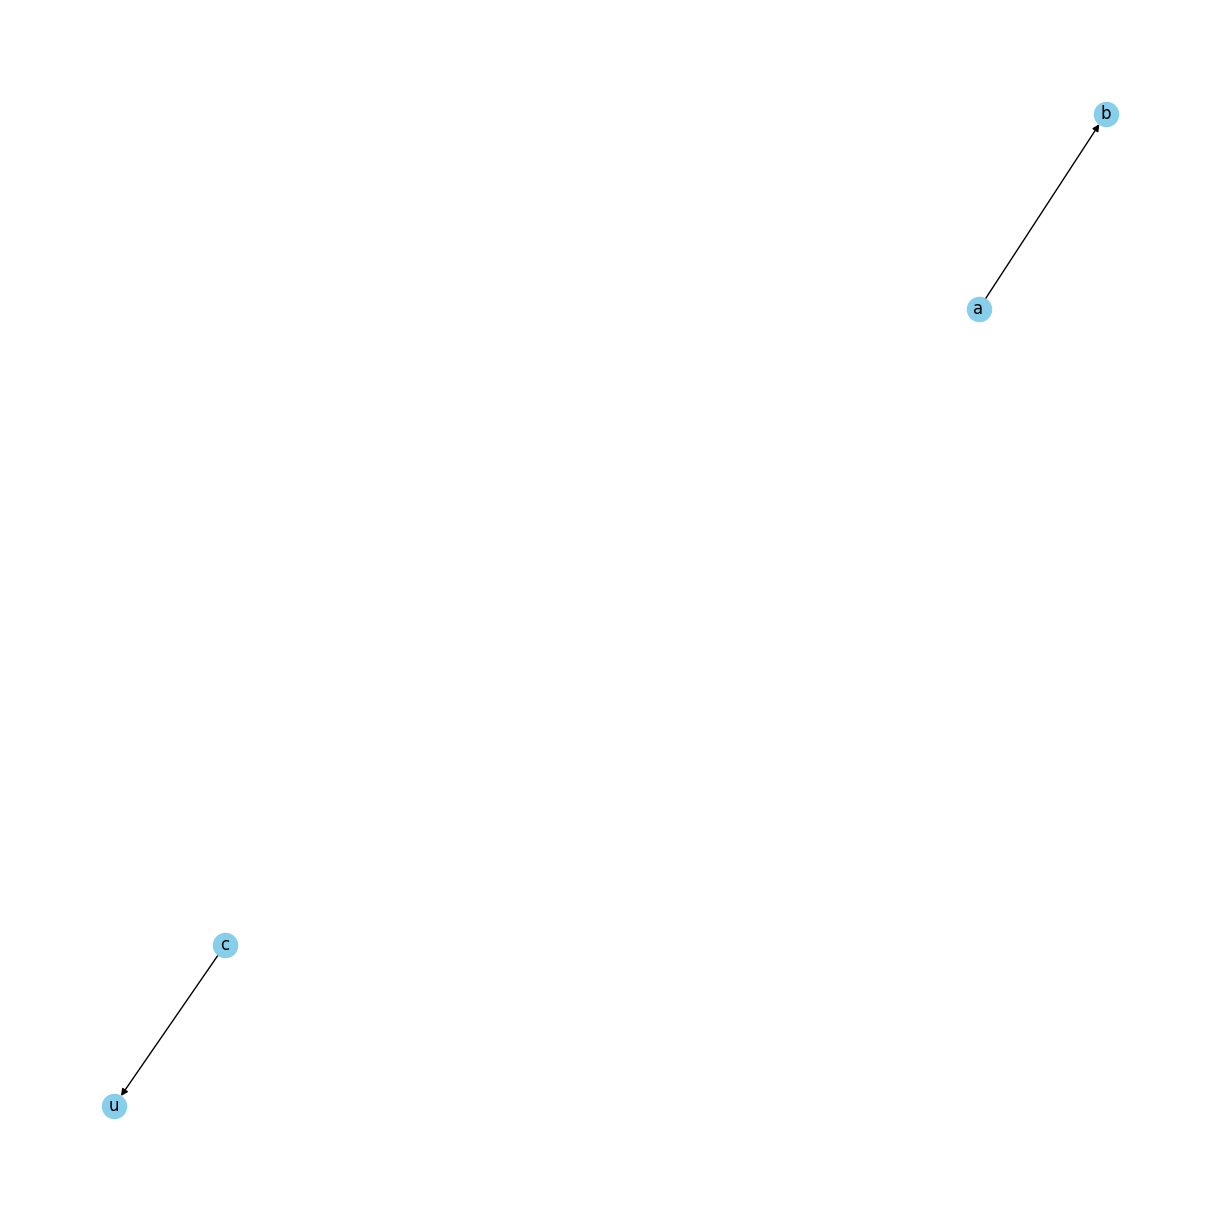

In [19]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()